# РК2 Даниелян А.А. ИУ5-64б Вариант 4

Импортируем необходимые пакеты

In [48]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")

Загрузим датасет

In [49]:
df = pd.read_csv('./toy_dataset.csv')
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


Закодируем категориальные признаки

In [50]:
df.loc[df['Gender']=='Male','Gender'] = 1
df.loc[df['Gender']=='Female','Gender'] = 0
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_results = lb.fit_transform(df['City'])
new_df = pd.DataFrame(lb_results, columns=lb.classes_)
df = pd.concat([df, new_df], axis = 1)

df.head()

,Number,City,Gender,Age,Income,Illness,Austin,Boston,Dallas,Los Angeles,Mountain View,New York City,San Diego,Washington D.C.
0,1,Dallas,1,41,40367.0,No,0,0,1,0,0,0,0,0
1,2,Dallas,1,54,45084.0,No,0,0,1,0,0,0,0,0
2,3,Dallas,1,42,52483.0,No,0,0,1,0,0,0,0,0
3,4,Dallas,1,40,40941.0,No,0,0,1,0,0,0,0,0
4,5,Dallas,1,46,50289.0,No,0,0,1,0,0,0,0,0


Выделим целевое значение и разделим данные на тестовую и обучающую выборки

In [51]:
X = df.drop(['Illness','Number', 'City'], axis=1)
y = df.Illness

In [52]:
encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(y), name='Illness')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)


Обучим модель Логистической регрессии

In [53]:
rgs_log = LogisticRegression()
rgs_log.fit(X_train,y_train)

LogisticRegression()

Обучим модель Градиентного бустинга

In [54]:

cls_gbt = GradientBoostingClassifier(n_estimators=200)
cls_gbt.fit(X_train,y_train)


GradientBoostingClassifier(n_estimators=200)

Выведем метрики и матрицу ошибок для модели Логистической регрессии

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     34494
           1       0.00      0.00      0.00      3006

    accuracy                           0.92     37500
   macro avg       0.46      0.50      0.48     37500
weighted avg       0.85      0.92      0.88     37500



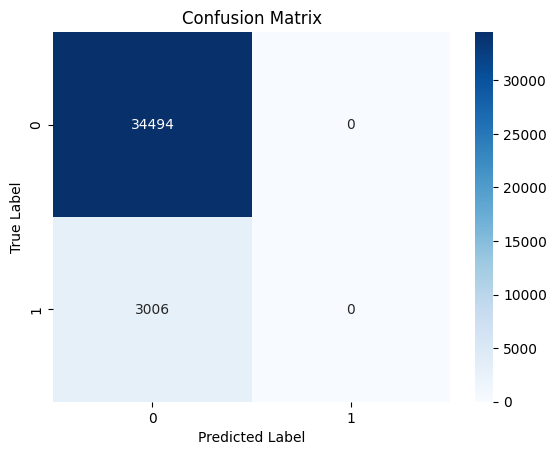

In [55]:

# Make predictions on the test set
y_pred = rgs_log.predict(X_test)

# Evaluate the classifier
print('Classification Report:')
print(classification_report(y_test, y_pred))
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Выведем метрики и матрицу ошибок для модели Градиентного бустинга

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     34494
           1       0.25      0.00      0.00      3006

    accuracy                           0.92     37500
   macro avg       0.58      0.50      0.48     37500
weighted avg       0.87      0.92      0.88     37500



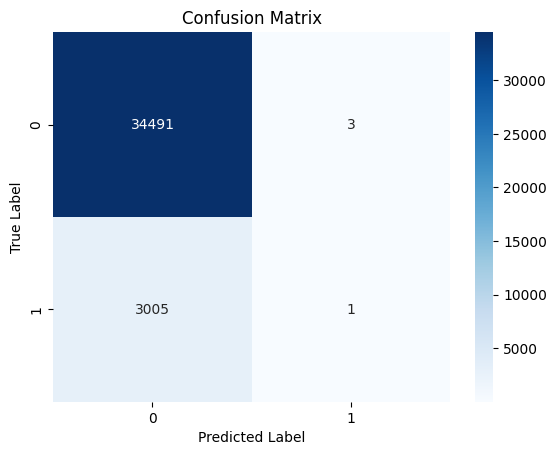

In [56]:
# Make predictions on the test set
y_pred = cls_gbt.predict(X_test)

# Evaluate the classifier
print('Classification Report:')
print(classification_report(y_test, y_pred))
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Показатели метрик вышли неплохими, например, accuracy = 92%, что достаточно хорошо. Однако, посмотрев на матрицу ошибок, заметим, что модели не могут правильно определить элементы с Illness = No.
Можно предположить, что это связано с тем, что данные в выборке подобраны не очень хоррошо: количество записей категории 1 во много раз больше количества записей категории 2. Чтобы исправить ситуацию - можно выравнить количество записей каждого типа в выборке.